##Datasets

Using the tool Exportify, we were able to generate our own database of songs directly from spotify, called "playlist.csv"

In [ ]:
filename = '/content/liked.csv'

from matplotlib import pyplot
import seaborn as sns
import pandas as pd
from collections import defaultdict
from scipy.stats import pareto, gamma
from datetime import date

# read the data
data = pd.read_csv(filename)
print("total songs:", data.shape[0])
data.describe()

total songs: 1000


,Duration (ms),Popularity,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000
mean,2.415233e+05,40.595000,0.509547,0.670303,5.130000,-7.368853,0.603000,0.111425,0.221721,0.235689,0.222753,0.378722,122.535054,3.8830
std,1.617287e+05,24.347398,0.206616,0.229985,3.605288,3.941170,0.489521,0.107546,0.286607,0.347833,0.183797,0.253622,30.297856,0.4664
min,0.000000e+00,0.000000,0.068600,0.000033,0.000000,-32.893000,0.000000,0.023400,0.000001,0.000000,0.019000,0.019500,54.669000,1.0000
25%,1.752650e+05,25.000000,0.350000,0.510000,2.000000,-9.166500,0.000000,0.040400,0.008420,0.000009,0.103000,0.168000,98.427000,4.0000
50%,2.157000e+05,43.000000,0.529500,0.712000,5.000000,-6.762500,1.000000,0.064100,0.073200,0.005620,0.140000,0.351000,121.880500,4.0000
75%,2.737600e+05,59.000000,0.667500,0.857000,8.000000,-4.878250,1.000000,0.139500,0.382000,0.506500,0.305750,0.544250,141.474500,4.0000
max,3.740556e+06,94.000000,0.947000,1.000000,11.000000,5.118000,1.000000,0.612000,0.991000,0.994000,0.948000,0.998000,203.737000,5.0000


In [ ]:
data.head()

,Spotify ID,Artist IDs,Name,Album Name,Artist,Release Date,Duration (ms),Popularity,Added By,Added At,...,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
0,7qG7bsMPOmiMt0uT13cLx5,2ueoLVCXQ948OfhVvAy3Nn,Photograph,Ugly Season,Perfume Genius,17/06/2022,281190,44,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,1,-11.530,1,0.0313,0.348000,0.8000,0.103,0.1350,175.193,4
1,5TwGBk0aK6R7353qf2itiz,5PIuMlRY9PSLUSFzs6lQu1,GOD OF LOVE,H.A.Q.Q.,Liturgy,12/11/2019,489666,28,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,4,-5.066,0,0.1070,0.000042,0.9580,0.151,0.0675,130.845,3
2,2qEzmk3ZOiP6IqTVDX5f2k,4SQdUpG4f7UbkJG3cJ2Iyj,Alive,Mutant,Arca,20/11/2015,236683,27,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,8,-6.967,1,0.1080,0.039500,0.1090,0.303,0.3690,119.949,4
3,42gzADgUU7e2yu5Qn8WfeC,6Ghvu1VvMGScGpOUJBAHNH,Please Please Please Let Me Get What I Want - ...,B-Sides & Rarities,Deftones,2005,124173,60,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,2,-4.645,1,0.0613,0.000004,0.4090,0.136,0.1490,190.747,3
4,4X4ZHPOgp5DLh3tYZD5YYU,"3OsHwkxpSIEqqmYoQxZTT5,58HQ1Pad1k4hwlbAQ6uIc5",Pretty Women,"Sweeney Todd, The Demon Barber of Fleet Street...","Johnny Depp,Alan Rickman",17/12/2007,267546,43,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,2,-14.947,0,0.0456,0.886000,0.0101,0.759,0.3070,81.268,4


number of unique genres: 539


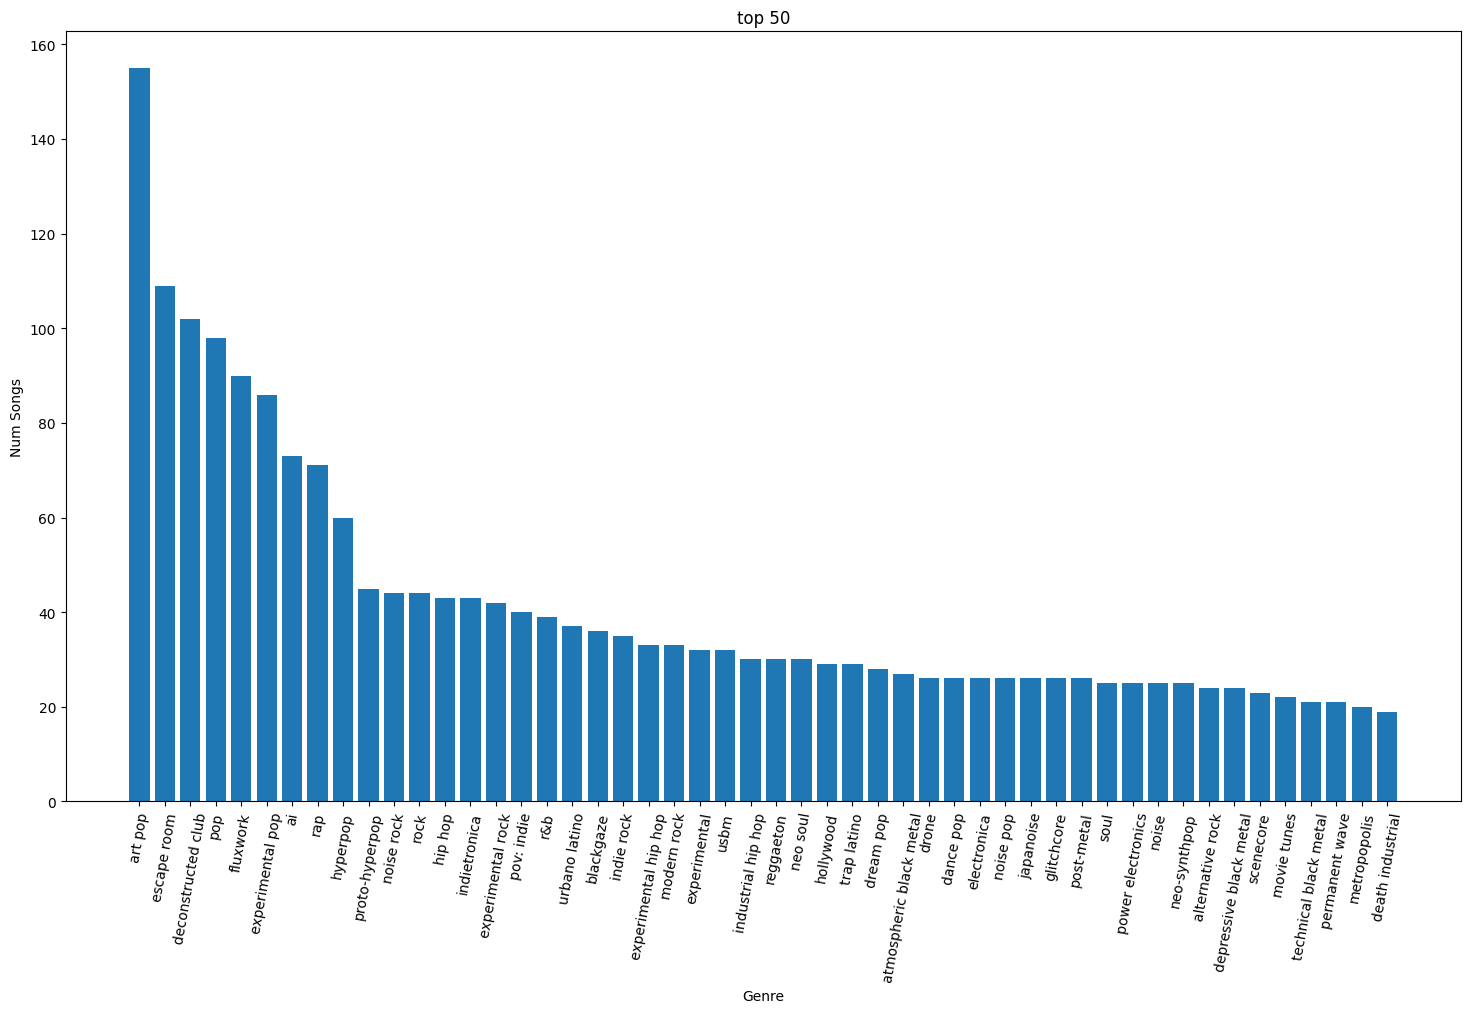

In [ ]:
genres = defaultdict(int)
for i,song in data.iterrows():
    if type(song['Genres']) is str: # some times there aren't any, and this is NaN
        for genre in song['Genres'].split(','):
            if len(genre) > 0: # empty string seems to be a legit genre
                genres[genre] += 1

genres = pd.DataFrame(genres.items(), columns=['Genre', 'Num Songs']
                          ).sort_values('Num Songs', ascending=False).reset_index(drop=True)
print("number of unique genres:", genres.shape[0])

y = []
for i in range(genres.shape[0]):
	for j in range(genres['Num Songs'][i]):
		y.append(i)

#show top 50 genres
param = pareto.fit(y, 100)
pareto_fitted = len(y)*pareto.pdf(range(genres.shape[0]), *param)

pyplot.figure(figsize=(18, 10))
pyplot.bar(genres['Genre'][:50], genres['Num Songs'][:50])
pyplot.xticks(rotation=80)
pyplot.xlabel(genres.columns[0])
pyplot.ylabel(genres.columns[1])
pyplot.title('top 50');

##Musical Features
In the interest of understanding user tastes and providing the best possible music recommendations, Spotify has done some really sophisticated analysis of the track content. Music is a time series, but most similarity metrics require inputs to be vectors, so they've transformed the tracks to numerical metrics like Tempo and Acousticness(continuous) and Key (discrete).

continuous music features


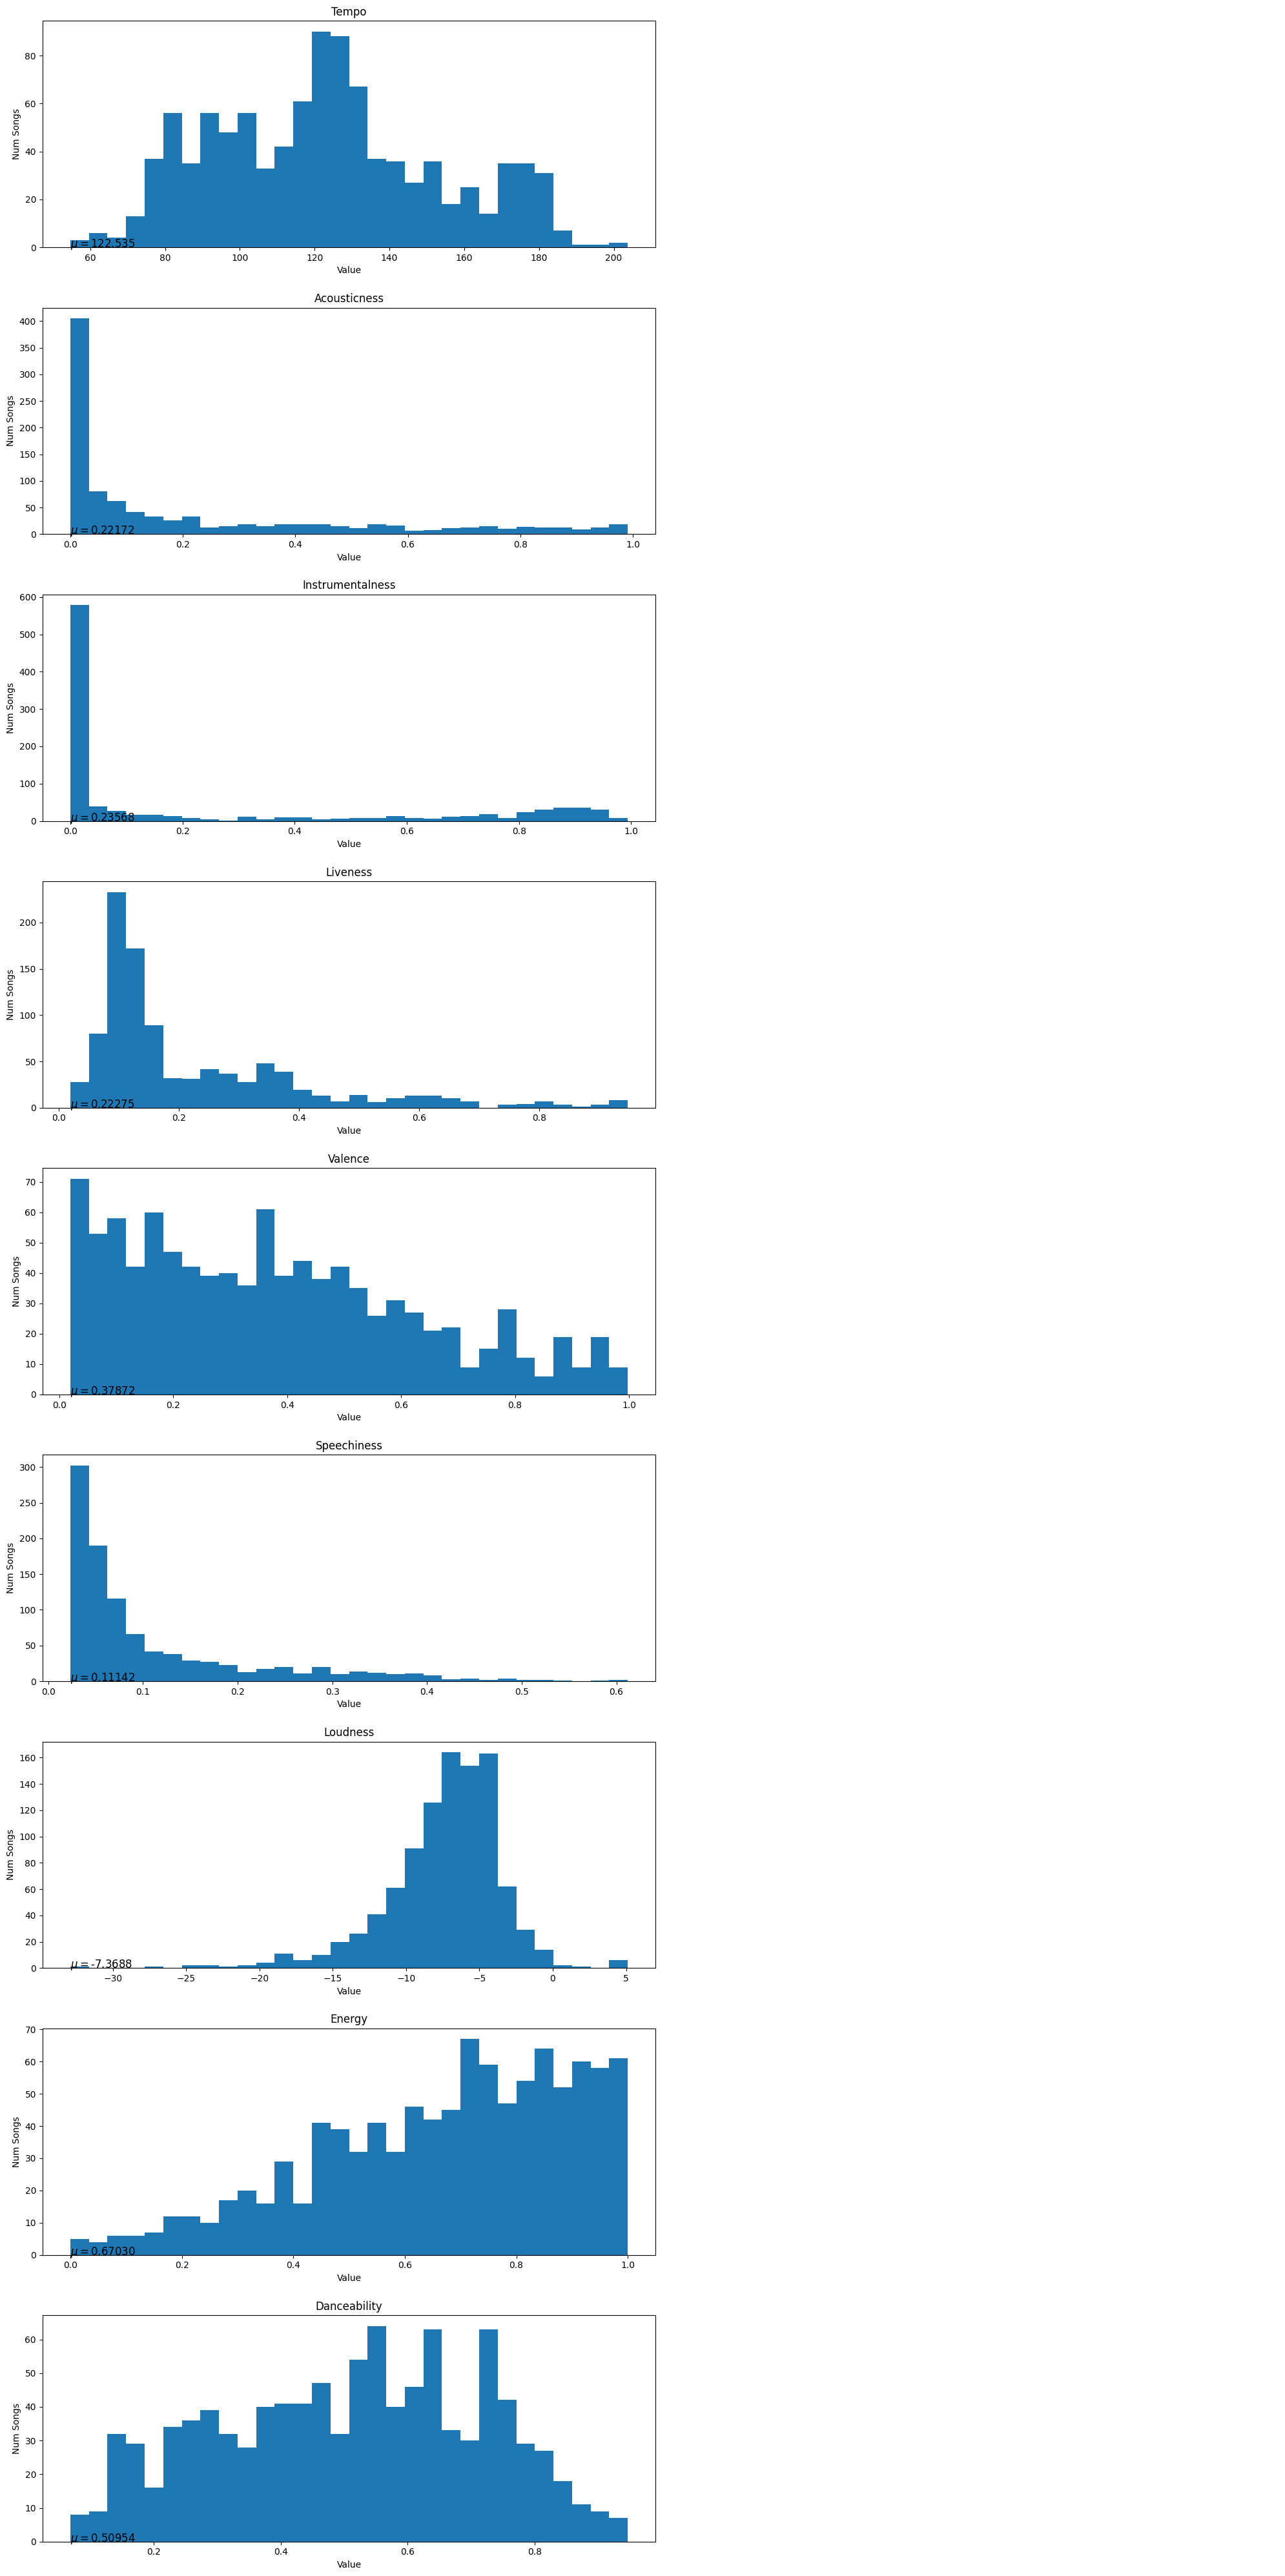

In [ ]:
pyplot.figure(figsize=(20,40))

for i,category in enumerate(['Tempo', 'Acousticness', 'Instrumentalness', 'Liveness',
                            'Valence', 'Speechiness', 'Loudness', 'Energy', 'Danceability']):
    pyplot.subplot(9, 2, i*2+1)
    pyplot.hist(data[category], bins=30)
    pyplot.text(min(data[category]), 0, r'$\mu=$'+str(data[category].mean())[:7], fontsize=12)
    pyplot.xlabel('Value')
    pyplot.ylabel('Num Songs')
    pyplot.title(category)
    pyplot.subplot(9, 2, i*2+2)
    pyplot.axis('off')
pyplot.tight_layout(h_pad=2)

print("continuous music features")


We are going to add another column called score to the playlist data that will help to distinct between our playlist and the database

In [ ]:
data.describe()
data["score"] = 1
data.to_csv("/content/liked.csv", index=False)
data.head()

,Spotify ID,Artist IDs,Name,Album Name,Artist,Release Date,Duration (ms),Popularity,Added By,Added At,...,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,score
0,7qG7bsMPOmiMt0uT13cLx5,2ueoLVCXQ948OfhVvAy3Nn,Photograph,Ugly Season,Perfume Genius,17/06/2022,281190,44,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,-11.530,1,0.0313,0.348000,0.8000,0.103,0.1350,175.193,4,1
1,5TwGBk0aK6R7353qf2itiz,5PIuMlRY9PSLUSFzs6lQu1,GOD OF LOVE,H.A.Q.Q.,Liturgy,12/11/2019,489666,28,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,-5.066,0,0.1070,0.000042,0.9580,0.151,0.0675,130.845,3,1
2,2qEzmk3ZOiP6IqTVDX5f2k,4SQdUpG4f7UbkJG3cJ2Iyj,Alive,Mutant,Arca,20/11/2015,236683,27,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,-6.967,1,0.1080,0.039500,0.1090,0.303,0.3690,119.949,4,1
3,42gzADgUU7e2yu5Qn8WfeC,6Ghvu1VvMGScGpOUJBAHNH,Please Please Please Let Me Get What I Want - ...,B-Sides & Rarities,Deftones,2005,124173,60,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,-4.645,1,0.0613,0.000004,0.4090,0.136,0.1490,190.747,3,1
4,4X4ZHPOgp5DLh3tYZD5YYU,"3OsHwkxpSIEqqmYoQxZTT5,58HQ1Pad1k4hwlbAQ6uIc5",Pretty Women,"Sweeney Todd, The Demon Barber of Fleet Street...","Johnny Depp,Alan Rickman",17/12/2007,267546,43,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,...,-14.947,0,0.0456,0.886000,0.0101,0.759,0.3070,81.268,4,1


To predict on a wide variety of songs like spotify does, we are using a dataset that has 114000 tracks

In [ ]:
# read the data
dataset = pd.read_csv('/content/dataset.csv', index_col=0, encoding='latin-1')
print("total songs:", dataset.shape[0])
dataset.describe()

total songs: 114000


,Popularity,Duration (ms),Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
#add score to the dataset
dataset.describe()
dataset["score"] = 0
dataset.to_csv("/content/dataset.csv", index=False)
dataset.head()

,Artist,Album Name,Name,Popularity,Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Genres,score
Spotify ID,,,,,,,,,,,,,,,,,,,,
5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,0
4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,0
1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,0
6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,0
5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,0


##Splitting

We can compare in histograms features of the liked songs against the dataset ones

<Axes: >

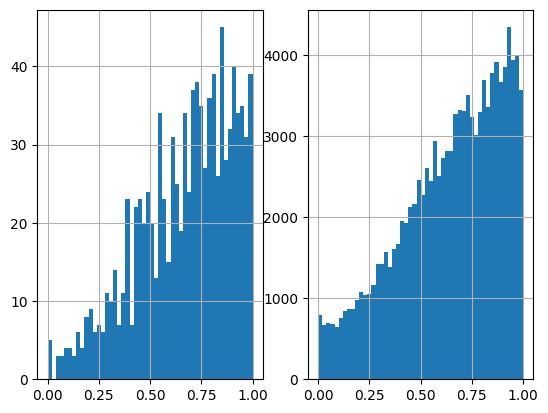

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

energy_p = data[data['score']==1]['Energy']
energy_d = dataset[dataset['score']==0]['Energy']

fig, axes = plt.subplots(1, 2)

energy_p.hist( bins=50, ax=axes[0])
energy_d.hist( bins=50,  ax=axes[1])

In [ ]:
print("total songs:", data.shape[0])
print("total songs:", dataset.shape[0])

total songs: 1000
total songs: 114000


In the last histogram we can notice that the size of our playlist and dataset is very diferent, for that reason, we're going to take a random part the same size of the playlist from the dataset.

In [ ]:
dfequal = dataset.sample(n= data.shape[0])
dfequal.to_csv("/content/dataset.csv", index=False)
dfequal.head()

,Artist,Album Name,Name,Popularity,Duration (ms),Explicit,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,Genres,score
Spotify ID,,,,,,,,,,,,,,,,,,,,
1OPoUUFSLgXXsFcjP1SRIS,The Drifters,Perfect Christmas Hits,White Christmas,0,158533,False,0.578,0.182,8,-10.424,1,0.0444,0.825000,0.000005,0.144,0.477,127.363,4,rockabilly,0
0zqBZqm5czQ3A4EoSdKFHj,Alan Walker;Benjamin Ingrosso,World Of Walker,Man On The Moon,73,178625,False,0.668,0.816,4,-5.648,0,0.0367,0.055700,0.000001,0.197,0.500,129.971,4,electro,0
3H8OiohyQRpHw4YJLzclKg,Paintamelody,Still With You Army Piano Collection Album,Still With You (Lo-Fi Jazzhop),30,244176,False,0.637,0.368,1,-16.698,0,0.0399,0.867000,0.917000,0.161,0.605,173.237,4,piano,0
1aQjSuo7Oul4A51k6dQxAp,Gorgon City;Laura Welsh,Halloween & Chill,Here For You,0,233480,False,0.655,0.678,6,-6.799,0,0.0382,0.024800,0.090100,0.116,0.320,121.978,4,garage,0
7JZ7vkvvcPQosemzZlaAOY,Good Riddance,A Comprehensive Guide to Moderne Rebellion,Steps,31,134960,False,0.351,0.953,4,-5.590,1,0.0526,0.000141,0.000375,0.076,0.428,105.304,4,hardcore,0


We are going to merge both csv before splitting


In [ ]:
import glob as gl
import os as os
#list all csv files only
csv_files = gl.glob( '**.csv' )
csv_files

df_append = pd.DataFrame()
#append all files together
for file in csv_files:
            df_temp = pd.read_csv(file, index_col=1, encoding='latin-1')
            df_append = df_append.append(df_temp, ignore_index=True)
df_append

<ipython-input-11-bf139e5cd792>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
<ipython-input-11-bf139e5cd792>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_append = df_append.append(df_temp, ignore_index=True)
/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=datafram

,Spotify ID,Name,Album Name,Artist,Release Date,Duration (ms),Popularity,Added By,Added At,Genres,...,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,score,Explicit
0,7qG7bsMPOmiMt0uT13cLx5,Photograph,Ugly Season,Perfume Genius,17/06/2022,281190,44,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"art pop,chamber pop,indie rock,indietronica,ne...",...,1,0.0313,0.348000,0.800000,0.1030,0.1350,175.193,4,1,NaN
1,5TwGBk0aK6R7353qf2itiz,GOD OF LOVE,H.A.Q.Q.,Liturgy,12/11/2019,489666,28,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"experimental black metal,nyc metal,technical b...",...,0,0.1070,0.000042,0.958000,0.1510,0.0675,130.845,3,1,NaN
2,2qEzmk3ZOiP6IqTVDX5f2k,Alive,Mutant,Arca,20/11/2015,236683,27,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"ai,art pop,deconstructed club,escape room,expe...",...,1,0.1080,0.039500,0.109000,0.3030,0.3690,119.949,4,1,NaN
3,42gzADgUU7e2yu5Qn8WfeC,Please Please Please Let Me Get What I Want - ...,B-Sides & Rarities,Deftones,2005,124173,60,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"alternative metal,nu metal,rap metal,rock,sacr...",...,1,0.0613,0.000004,0.409000,0.1360,0.1490,190.747,3,1,NaN
4,4X4ZHPOgp5DLh3tYZD5YYU,Pretty Women,"Sweeney Todd, The Demon Barber of Fleet Street...","Johnny Depp,Alan Rickman",17/12/2007,267546,43,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,hollywood,...,0,0.0456,0.886000,0.010100,0.7590,0.3070,81.268,4,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,Through Being Cool,NaN,Saves The Day,NaN,124146,31,NaN,NaN,hardcore,...,1,0.0368,0.003650,0.000000,0.2000,0.7010,97.844,4,0,False
1996,NaN,Clothes Dryer,NaN,Baby Sweet Dream,NaN,300000,33,NaN,NaN,sleep,...,1,0.0562,0.894000,0.341000,0.1200,0.0396,123.577,4,0,False
1997,NaN,Modular Fantasy No.1 (Remastered),NaN,Parsa Shomali,NaN,160000,0,NaN,NaN,iranian,...,0,0.0410,0.910000,0.949000,0.0429,0.0393,137.073,5,0,False
1998,NaN,Te Quiero MÃÂ¡s,NaN,TINI;Nacho,NaN,205173,0,NaN,NaN,latin,...,0,0.0987,0.353000,0.000000,0.2720,0.8480,115.001,4,0,False


We're going to add an id for each song

In [ ]:
df_append['ID'] = range(0, len(df_append))

In [ ]:
df_append

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,Spotify ID,Name,Album Name,Artist,Release Date,Duration (ms),Popularity,Added By,Added At,Genres,...,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time Signature,score,Explicit,ID
0,7qG7bsMPOmiMt0uT13cLx5,Photograph,Ugly Season,Perfume Genius,17/06/2022,281190,44,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"art pop,chamber pop,indie rock,indietronica,ne...",...,0.0313,0.348000,0.800000,0.1030,0.1350,175.193,4,1,NaN,0
1,5TwGBk0aK6R7353qf2itiz,GOD OF LOVE,H.A.Q.Q.,Liturgy,12/11/2019,489666,28,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"experimental black metal,nyc metal,technical b...",...,0.1070,0.000042,0.958000,0.1510,0.0675,130.845,3,1,NaN,1
2,2qEzmk3ZOiP6IqTVDX5f2k,Alive,Mutant,Arca,20/11/2015,236683,27,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"ai,art pop,deconstructed club,escape room,expe...",...,0.1080,0.039500,0.109000,0.3030,0.3690,119.949,4,1,NaN,2
3,42gzADgUU7e2yu5Qn8WfeC,Please Please Please Let Me Get What I Want - ...,B-Sides & Rarities,Deftones,2005,124173,60,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,"alternative metal,nu metal,rap metal,rock,sacr...",...,0.0613,0.000004,0.409000,0.1360,0.1490,190.747,3,1,NaN,3
4,4X4ZHPOgp5DLh3tYZD5YYU,Pretty Women,"Sweeney Todd, The Demon Barber of Fleet Street...","Johnny Depp,Alan Rickman",17/12/2007,267546,43,spotify:user:0efdcvdym10ihli6t8j3eolu5,2023-05-20T20:27:15Z,hollywood,...,0.0456,0.886000,0.010100,0.7590,0.3070,81.268,4,1,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,NaN,Through Being Cool,NaN,Saves The Day,NaN,124146,31,NaN,NaN,hardcore,...,0.0368,0.003650,0.000000,0.2000,0.7010,97.844,4,0,False,1995
1996,NaN,Clothes Dryer,NaN,Baby Sweet Dream,NaN,300000,33,NaN,NaN,sleep,...,0.0562,0.894000,0.341000,0.1200,0.0396,123.577,4,0,False,1996
1997,NaN,Modular Fantasy No.1 (Remastered),NaN,Parsa Shomali,NaN,160000,0,NaN,NaN,iranian,...,0.0410,0.910000,0.949000,0.0429,0.0393,137.073,5,0,False,1997
1998,NaN,Te Quiero MÃÂ¡s,NaN,TINI;Nacho,NaN,205173,0,NaN,NaN,latin,...,0.0987,0.353000,0.000000,0.2720,0.8480,115.001,4,0,False,1998


In [ ]:
from sklearn.model_selection import train_test_split
train, test =train_test_split(df_append, test_size =0.2)
print("Training size: {}; Test size: {}".format(len(train),len(test)))

Training size: 1600; Test size: 400


<Axes: >

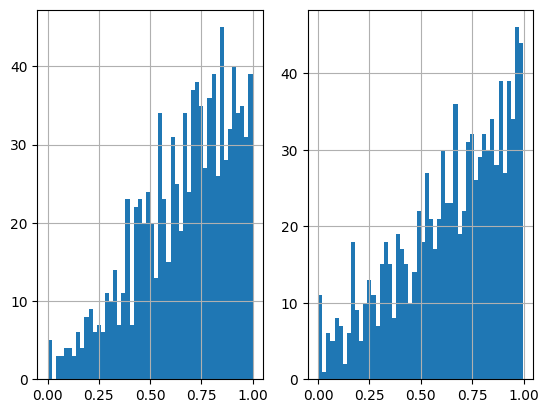

In [ ]:
energy_p = df_append[df_append['score']==1]['Energy']
energy_d = df_append[df_append['score']==0]['Energy']

fig, axes = plt.subplots(1, 2)

energy_p.hist( bins=50, ax=axes[0])
energy_d.hist( bins=50,  ax=axes[1])


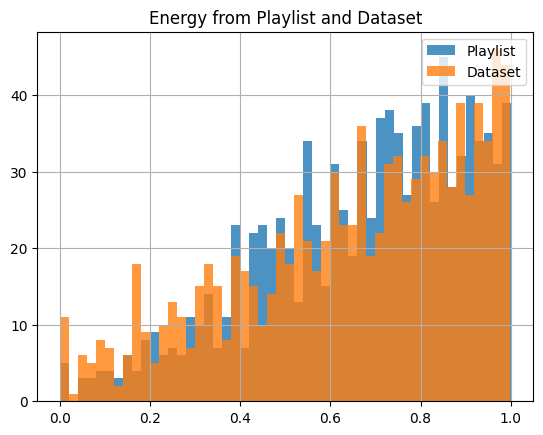

In [ ]:
plt.title("Energy from Playlist and Dataset")
energy_p.hist(alpha=0.8, bins=50, label="Playlist")
energy_d.hist(alpha=0.8, bins=50, label="Dataset")
plt.legend(loc="upper right")

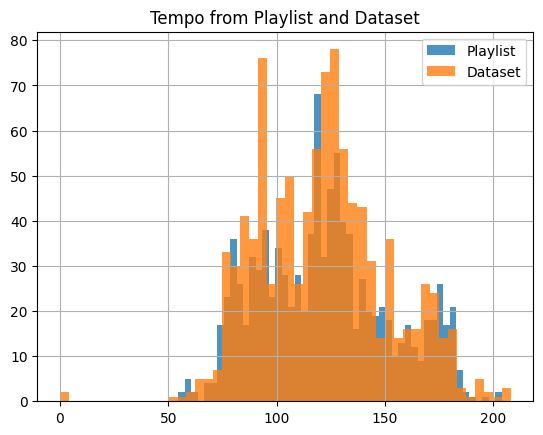

In [ ]:
#The histograms give us a representation of the atribute distribution in both playlist and dataset
tempo_p = df_append[df_append['score']==1]['Tempo']
tempo_d = df_append[df_append['score']==0]['Tempo']
plt.title("Tempo from Playlist and Dataset")
tempo_p.hist(alpha=0.8, bins=50, label="Playlist")
tempo_d.hist(alpha=0.8, bins=50, label="Dataset")
plt.legend(loc="upper right")

##Decision Tree Classifier

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import graphviz
import pydotplus
import io
import scipy.misc
import imageio

In [ ]:
c=DecisionTreeClassifier(min_samples_split=100)
features = ["Danceability", "Duration (ms)", "Loudness", "Speechiness", "Valence", "Energy", "Key", "Acousticness", "Instrumentalness"]

In [ ]:
#training set
x_train = train[features]
y_train = train["score"]

#test set
x_test = test[features]
y_test = test["score"]

In [ ]:
dt = c.fit(x_train,y_train)

In [ ]:
def show_tree(tree, features, path):
    f = io.StringIO()
    export_graphviz(tree, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)

<ipython-input-167-4a674d027c65>:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(path)


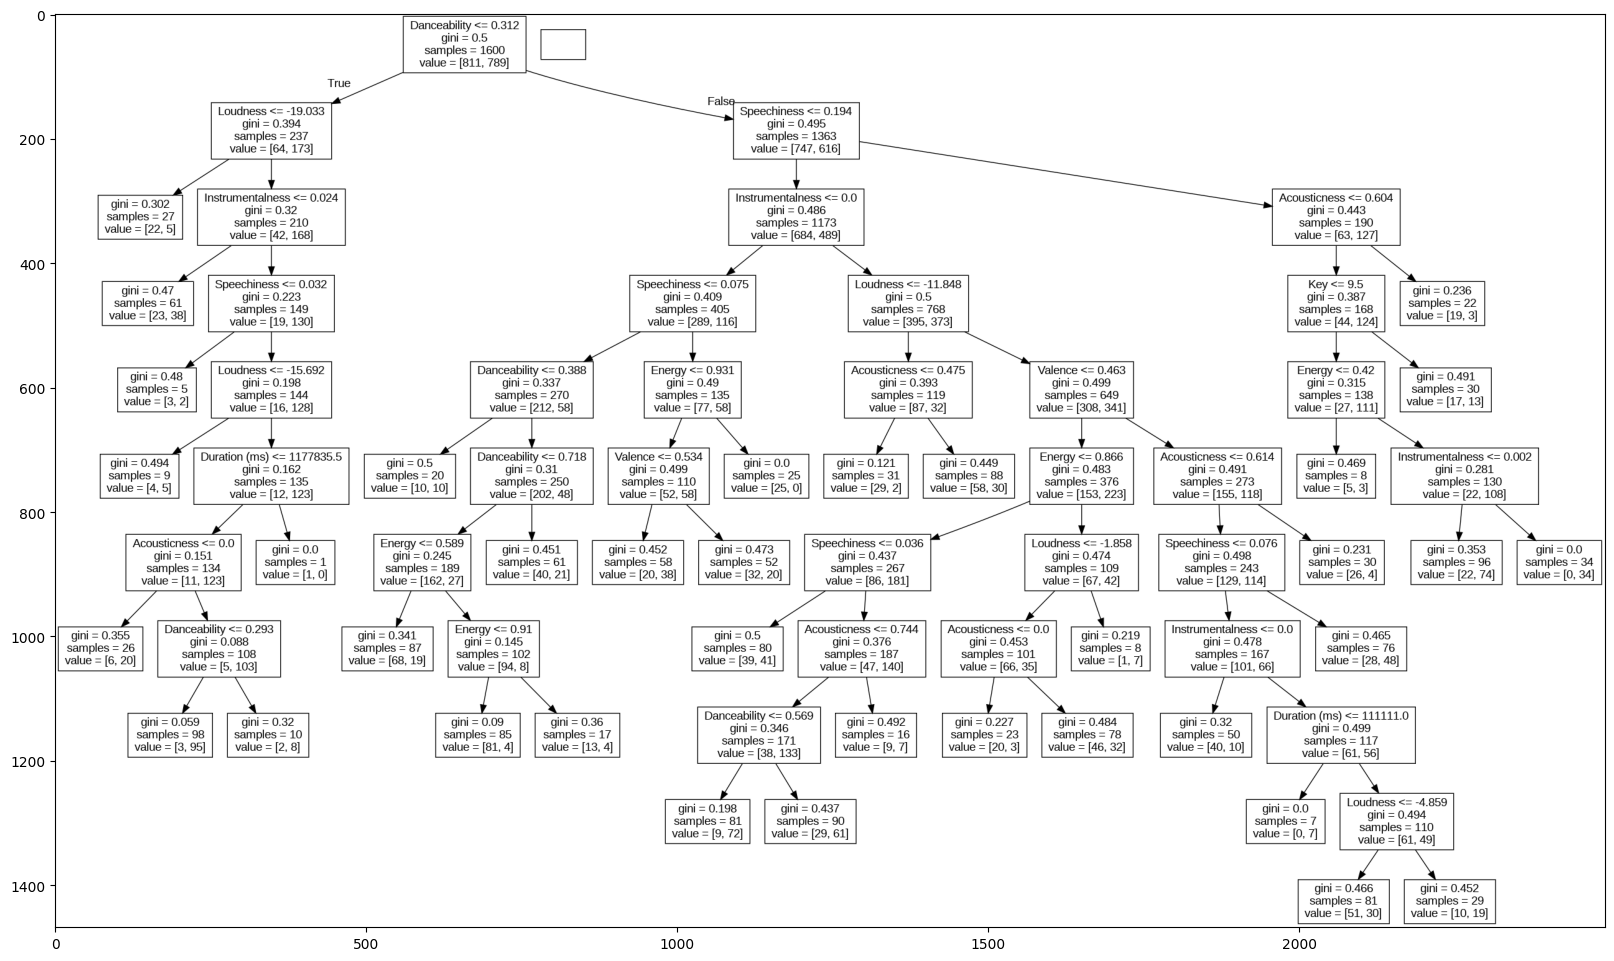

In [ ]:
show_tree(dt, features, 'arbol.png')

**Predict**

In [ ]:
y_pred = dt.predict(x_test)

In [ ]:
canciones_recomendadas = x_test[y_pred==1]
r=df_append.Name[canciones_recomendadas.index]
s=df_append.score[canciones_recomendadas.index]
n=df_append.Artist[canciones_recomendadas.index]
j=pd.concat([r,s,n],axis=1)
newarbol = j.loc[j["score"] ==0 ]
newarbol

,Name,score,Artist
1878,Saawariya - Namah,0,Thaikkudam Bridge;Ram Narayan
1707,"Let Me in, Let`s Rock`n Roll",0,TT Grace
1354,Zombie,0,Eddy Tyler
1984,My Rules,0,Buggin
1670,Start Me Up - Remastered 2009,0,The Rolling Stones
1289,Sunsetz,0,Cigarettes After Sex
1563,Fairytale,0,Harry Gregson-Williams;John Powell
1316,You're Beautiful,0,James Blunt
1581,Thin Flesh,0,Traitrs
1419,PÃÂ¥ Gaden,0,Skurken


**Accuracy**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

In [ ]:
f1_score

0.6278481012658227

In [ ]:
accuracy

0.6325

In [ ]:
confusion_mat

array([[129,  60],
       [ 87, 124]])

##Linear Regression

In [ ]:
df_append[features]

,Danceability,Duration (ms),Loudness,Speechiness,Valence,Energy,Key,Acousticness,Instrumentalness
0,0.406,281190,-11.530,0.0313,0.1350,0.424,1,0.348000,0.800000
1,0.176,489666,-5.066,0.1070,0.0675,0.886,4,0.000042,0.958000
2,0.567,236683,-6.967,0.1080,0.3690,0.850,8,0.039500,0.109000
3,0.111,124173,-4.645,0.0613,0.1490,0.843,2,0.000004,0.409000
4,0.292,267546,-14.947,0.0456,0.3070,0.198,2,0.886000,0.010100
...,...,...,...,...,...,...,...,...,...
1995,0.546,124146,-4.451,0.0368,0.7010,0.934,10,0.003650,0.000000
1996,0.395,300000,-30.868,0.0562,0.0396,0.161,8,0.894000,0.341000
1997,0.147,160000,-13.953,0.0410,0.0393,0.163,0,0.910000,0.949000
1998,0.881,205173,-3.747,0.0987,0.8480,0.848,1,0.353000,0.000000


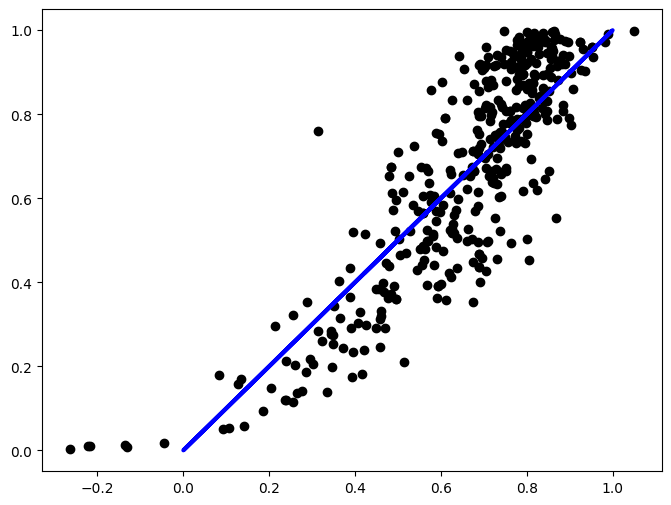

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.figure(figsize=(8,6))
linear_data = df_append[features]

#"Energy" will be the variable that we are trying to predict
X = linear_data.drop(linear_data.columns[5], axis=1)
y = linear_data["Energy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create linear regression model
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# Plot outputs
plt.scatter(y_pred, y_test, color="black")
plt.plot(y, y, color="blue", linewidth=3)

plt.show()

**Predict**

In [ ]:
canciones_recomendadas = X_test[y_pred>0.85]
r=df_append.Name[canciones_recomendadas.index]
s=df_append.score[canciones_recomendadas.index]
n=df_append.Artist[canciones_recomendadas.index]
j=pd.concat([r,s,n],axis=1)
newreg = j.loc[j["score"] ==0 ]
newreg

,Name,score,Artist
1636,Hate Me,0,Children Of Bodom
1926,Everything,0,The Dollyrots
1701,Count Your Bruises,0,The Flatliners
1842,Hard To Handle,0,The Black Crowes
1440,when we were young,0,Architects
1027,Eine Woche wach,0,Mickie Krause
1954,Plush,0,Stone Temple Pilots
1595,Camel by Camel - Mix Vocal,0,Sandy Marton
1231,What's My Scene,0,Hoodoo Gurus
1314,"Happy Holidays, You Bastard",0,blink-182


**Accuracy**

In [ ]:
# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [-1.18762669e-01 -1.40448849e-08  2.72643474e-02  2.33990984e-01
  1.65832681e-01  1.85115626e-03 -2.76199308e-01  8.58643189e-02]
Mean squared error: 0.02
Coefficient of determination: 0.74


KNN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
train, test = train_test_split(df_append, test_size=0.2)


x_train = train[features]
y_train = train["score"]

# Test set
x_test = test[features]
y_test = test["score"]

# Crear instancia del clasificador KNN
n_neighbors = 15
clf = KNeighborsClassifier(n_neighbors=n_neighbors)

# Ajustar el modelo utilizando el conjunto de entrenamiento
clf.fit(x_train, y_train)

# Obtener las predicciones para el conjunto de prueba
y_pred = clf.predict(x_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
f1score = f1_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("f1_score:", f1score)
print("Confusion Matrix:")
print(confusion_mat)A

Accuracy: 0.5425
f1_score: 0.5367088607594936
Confusion Matrix:
[[111  96]
 [ 87 106]]


In [ ]:
# Obtener las canciones recomendadas
canciones_recomendadas = x_test[y_pred == 1]

columname=df_append.Name[canciones_recomendadas.index]
calumscore=df_append.score[canciones_recomendadas.index]
columninartist=df_append.Artist[canciones_recomendadas.index]
musicR=pd.concat([columname,calumscore,columninartist],axis=1)
newKNN = musicR[musicR["score"] ==0 ]
newKNN

,Name,score,Artist
1502,Santo EspÃÂ­rito (Holy Spirit) (feat. Leonard...,0,Paulo Cesar Baruk;Leonardo GonÃÂ§alves
1801,Ã£ÂÂªÃ£ÂÂÃ£ÂÂ¤Ã£ÂÂ,0,UNIONE
1878,Saawariya - Namah,0,Thaikkudam Bridge;Ram Narayan
1723,DescendÃÂªncia,0,Pedro Henrique
1050,These Days,0,CASTLEBEAT
...,...,...,...
1999,All These Things,0,OneRepublic
1276,ÃÂÃÂ¶kertme,0,Cem Karaca
1634,Ã£ÂÂ©Ã£ÂÂÃ£ÂÂªÃ£ÂÂ¼Ã£ÂÂ¹Ã£ÂÂÃ£ÂÂ¤Ã£Â...,0,Shiritsu Ebisu Chugaku
1852,SCHLANGEN UM DEN HALS,0,Lugatti & 9ine


##Recommendations

In [ ]:
#Decision trees
newarbol

,Name,score,Artist
1514,PavÃÂ£o Mysteriozo,0,Ednardo
1897,Hard Talk,0,TJ Cream;Marko
1178,Algo En Que Creer,0,Carajo
1650,Calabria 2007 (feat. Natasja) - Radio Edit,0,Enur;Natasja
1390,Stormy Weather,0,Sarah Gayle Meech
...,...,...,...
1607,Rank Stranger,0,Ralph Stanley
1663,Lovers,0,Kiawasch Sahebnassagh
1118,Paranoid Android,0,Radiohead
1579,No Body,0,Blake Shelton


In [ ]:
#Linear regression
newreg

,Name,score,Artist
1636,Hate Me,0,Children Of Bodom
1926,Everything,0,The Dollyrots
1701,Count Your Bruises,0,The Flatliners
1842,Hard To Handle,0,The Black Crowes
1440,when we were young,0,Architects
1027,Eine Woche wach,0,Mickie Krause
1954,Plush,0,Stone Temple Pilots
1595,Camel by Camel - Mix Vocal,0,Sandy Marton
1231,What's My Scene,0,Hoodoo Gurus
1314,"Happy Holidays, You Bastard",0,blink-182


In [ ]:
#K Nearest Neighbor
newKNN

,Name,score,Artist
1502,Santo EspÃÂ­rito (Holy Spirit) (feat. Leonard...,0,Paulo Cesar Baruk;Leonardo GonÃÂ§alves
1801,Ã£ÂÂªÃ£ÂÂÃ£ÂÂ¤Ã£ÂÂ,0,UNIONE
1878,Saawariya - Namah,0,Thaikkudam Bridge;Ram Narayan
1723,DescendÃÂªncia,0,Pedro Henrique
1050,These Days,0,CASTLEBEAT
...,...,...,...
1999,All These Things,0,OneRepublic
1276,ÃÂÃÂ¶kertme,0,Cem Karaca
1634,Ã£ÂÂ©Ã£ÂÂÃ£ÂÂªÃ£ÂÂ¼Ã£ÂÂ¹Ã£ÂÂÃ£ÂÂ¤Ã£Â...,0,Shiritsu Ebisu Chugaku
1852,SCHLANGEN UM DEN HALS,0,Lugatti & 9ine


##References
```
https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset?resource=download
https://github.com/watsonbox/exportify
http://exportify.net/taste_analysis
https://www.chosic.com/spotify-liked-songs-organizer/
```

